In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


> **** Filling Missing Values****

In [6]:
data.isnull().sum().sum()

112

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum().sum()

0

**Weekend**

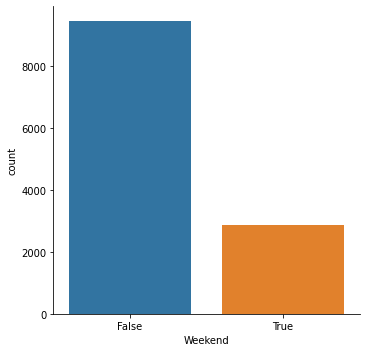

In [9]:
sns.catplot(x='Weekend',kind='count', data=data)

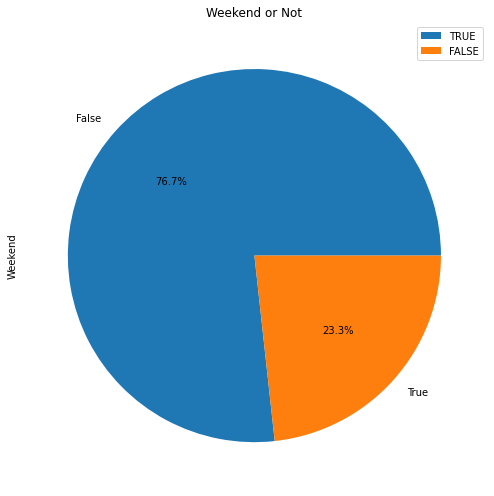

In [10]:
fig = plt.figure(figsize=(8,7))
data['Weekend'].value_counts().plot(kind="pie", autopct="%.1f%%")
plt.title("Weekend or Not")
plt.legend(labels=["TRUE", "FALSE"])
plt.tight_layout()
plt.show()

**Region**

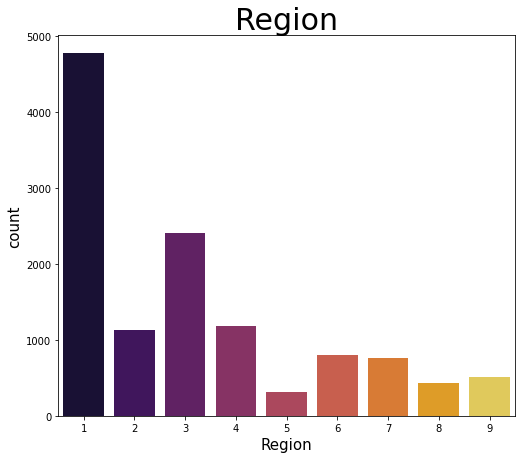

In [11]:
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(1,2,2)
sns.countplot(data['Region'], palette='inferno')
plt.title('Region', fontsize=30)
plt.xlabel('Region', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

**Revenue**

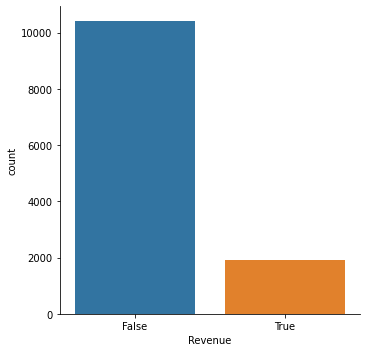

In [12]:
sns.catplot(x="Revenue", kind='count', data=data)

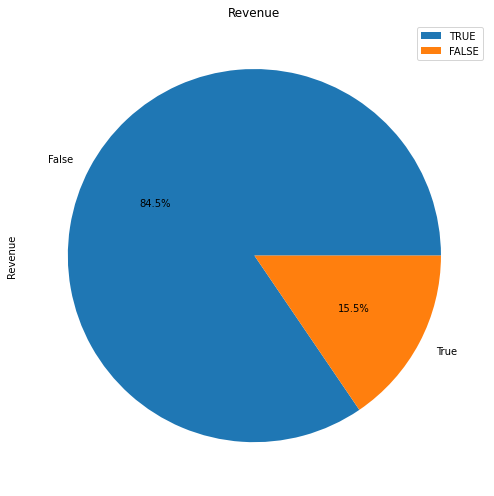

In [13]:
fig = plt.figure(figsize=(8,7))
data['Revenue'].value_counts().plot(kind="pie", autopct="%.1f%%")
plt.title("Revenue")
plt.legend(labels=["TRUE", "FALSE"])
plt.tight_layout()
plt.show()

**Traffic Type**

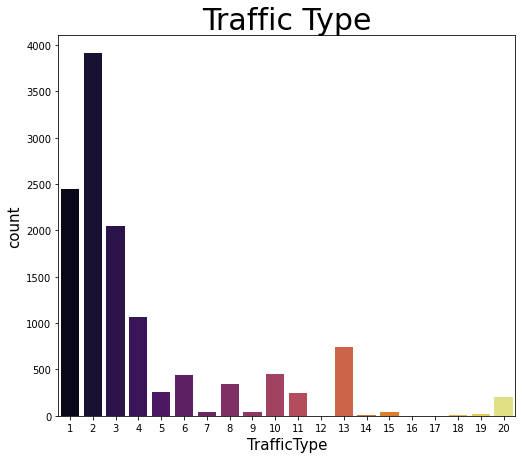

In [14]:
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(1,2,2)
sns.countplot(data['TrafficType'], palette='inferno')
plt.title('Traffic Type', fontsize=30)
plt.xlabel('TrafficType', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

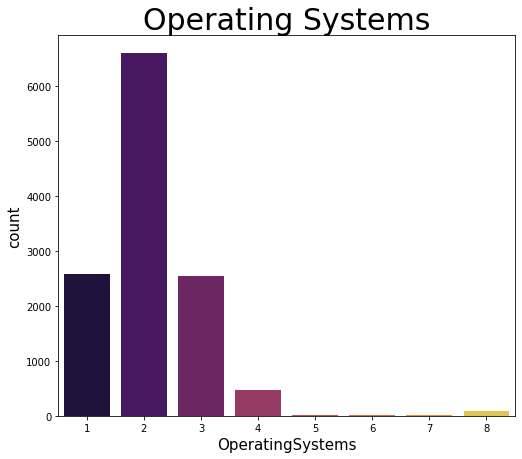

In [15]:
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(1,2,2)
sns.countplot(data['OperatingSystems'], palette='inferno')
plt.title('Operating Systems', fontsize=30)
plt.xlabel('OperatingSystems', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

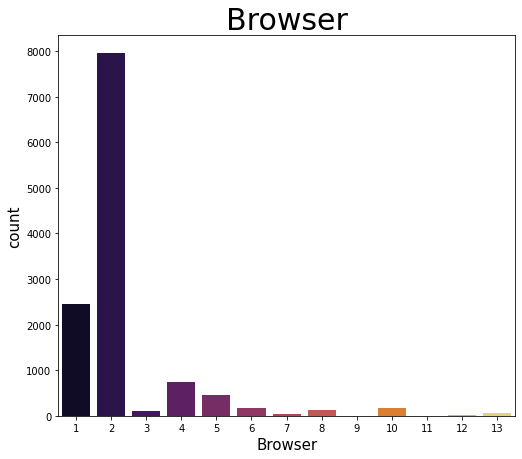

In [16]:
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(1,2,2)
sns.countplot(data['Browser'], palette='inferno')
plt.title('Browser', fontsize=30)
plt.xlabel('Browser', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

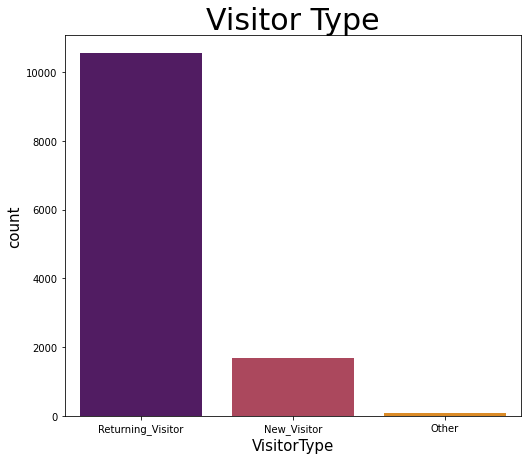

In [17]:
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(1,2,2)
sns.countplot(data['VisitorType'], palette='inferno')
plt.title('Visitor Type', fontsize=30)
plt.xlabel('VisitorType', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

**Bivariate Analyss**

***Weekend VS Revenue***

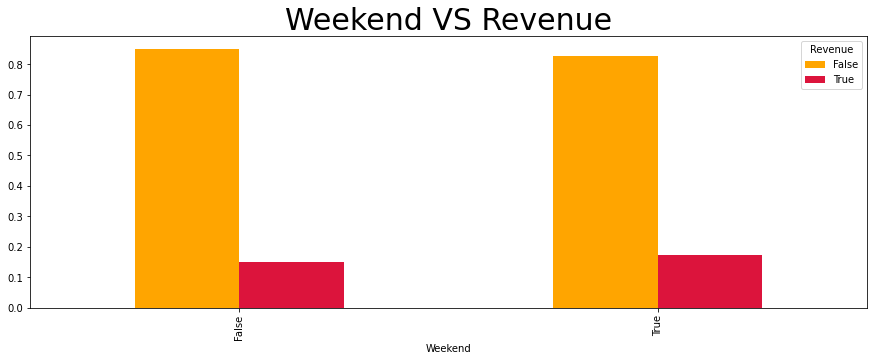

In [18]:
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15,5), color=['orange', 'crimson'])
plt.title('Weekend VS Revenue', fontsize=30)
plt.show()

**Visitor type VS Revenue**

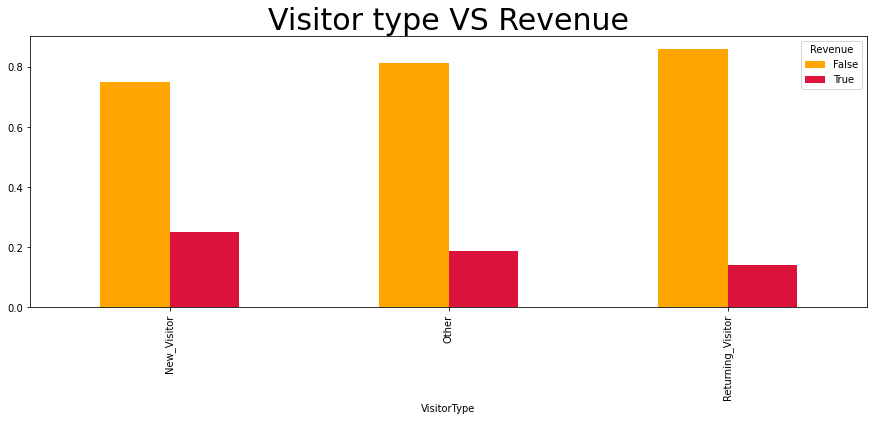

In [19]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15,5), color=['orange', 'crimson'])
plt.title('Visitor type VS Revenue', fontsize=30)
plt.show()

****Region vs Revenue****

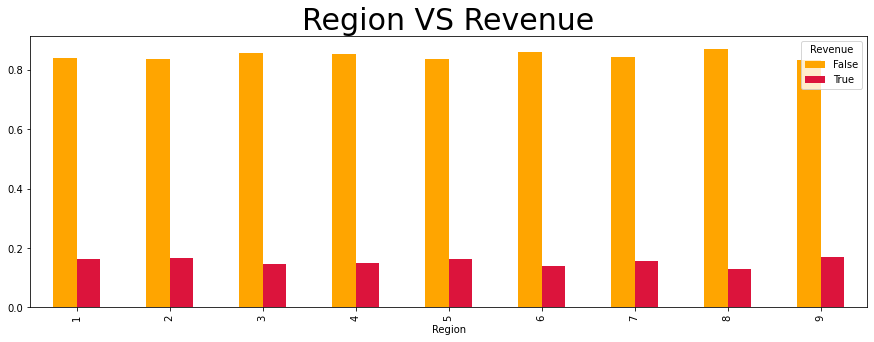

In [20]:
df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15,5), color=['orange', 'crimson'])
plt.title('Region VS Revenue', fontsize=30)
plt.show()

**Month VS Revenue**

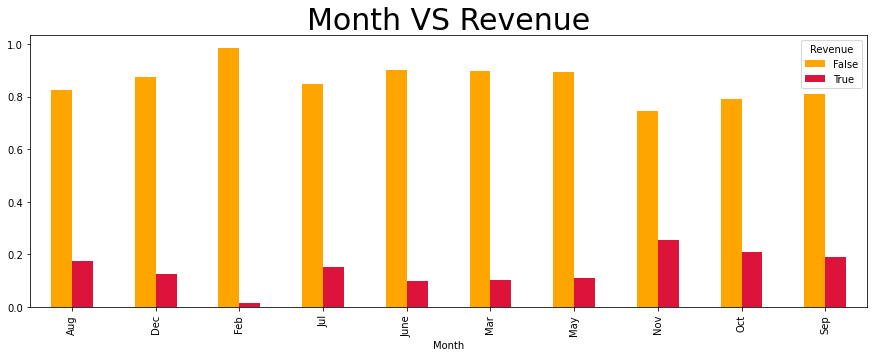

In [21]:
df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15,5), color=['orange', 'crimson'])
plt.title('Month VS Revenue', fontsize=30)
plt.show()

**Correlation Analysis**

In [22]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601466,0.376782,0.255757,0.430832,0.373647,-0.223474,-0.316192,0.098771,-0.095054,-0.006459,-0.025243,-0.005680,-0.033748,0.026404,0.138631
Administrative_Duration,0.601466,1.000000,0.302647,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463,-0.073472,-0.007425,-0.015525,-0.005681,-0.014487,0.014987,0.093395
Informational,0.376782,0.302647,1.000000,0.618965,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,-0.009435,-0.038257,-0.029442,-0.034510,0.035557,0.095085
Informational_Duration,0.255757,0.237959,0.618965,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787,-0.030658,-0.009596,-0.019346,-0.027244,-0.024731,0.024054,0.070250
ProductRelated,0.430832,0.288869,0.374098,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,0.004193,-0.013326,-0.038318,-0.043235,0.016097,0.158280
ProductRelated_Duration,0.373647,0.355238,0.387446,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623,-0.036598,0.002885,-0.007549,-0.033263,-0.036538,0.007293,0.152130
BounceRates,-0.223474,-0.144128,-0.116071,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357,0.073088,0.023965,-0.016009,-0.006731,0.078894,-0.046870,-0.150621
ExitRates,-0.316192,-0.205618,-0.163539,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397,0.102899,0.014745,-0.004407,-0.008836,0.078998,-0.062942,-0.206886
PageValues,0.098771,0.067463,0.048539,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000,-0.063660,0.018466,0.045510,0.011233,0.012471,0.011993,0.492494
SpecialDay,-0.095054,-0.073472,-0.048328,-0.030658,-0.024190,-0.036598,0.073088,0.102899,-0.063660,1.000000,0.012609,0.003412,-0.016188,0.052273,-0.016792,-0.082468


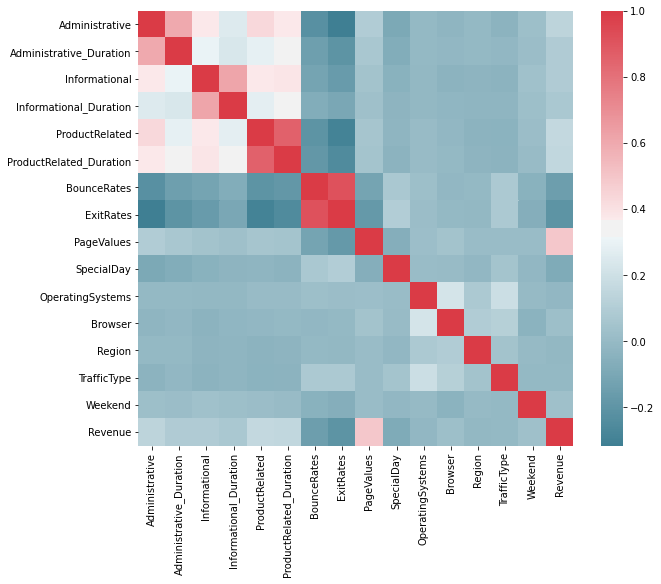

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

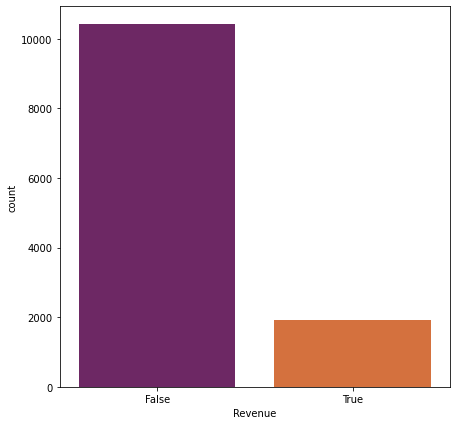

In [24]:
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(data['Revenue'], palette='inferno')

In [25]:
df = data

**Label Encoding**

In [26]:
df = pd.get_dummies(df,columns=['SpecialDay', 'Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])

In [27]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Revenue', 'SpecialDay_0.0',
       'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
       'SpecialDay_1.0', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'Tr

In [28]:
target = df['Revenue']
df = df.drop(columns=['Revenue'])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df,target,random_state=0)

In [30]:
X_train.shape

(9237, 80)

In [31]:
y_train.shape

(9237,)

**Decission Tree**

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.8629425138031829

In [33]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2599
        True       0.56      0.58      0.57       480

    accuracy                           0.86      3079
   macro avg       0.74      0.75      0.74      3079
weighted avg       0.86      0.86      0.86      3079



**Logistic Regression**

In [34]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8843780448197467

In [35]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2599
        True       0.78      0.36      0.49       480

    accuracy                           0.88      3079
   macro avg       0.83      0.67      0.71      3079
weighted avg       0.87      0.88      0.87      3079



**Extra Trees Classifier**

In [36]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.882104579408899

In [37]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2599
        True       0.77      0.35      0.48       480

    accuracy                           0.88      3079
   macro avg       0.83      0.67      0.71      3079
weighted avg       0.87      0.88      0.86      3079



**Gradient Boost Classifier**

In [38]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.90776226047418

In [39]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.93      0.96      0.95      2599
        True       0.75      0.61      0.67       480

    accuracy                           0.91      3079
   macro avg       0.84      0.79      0.81      3079
weighted avg       0.90      0.91      0.90      3079



**Random Forest Classifier**

In [40]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.9025657681065281

In [41]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2599
        True       0.79      0.51      0.62       480

    accuracy                           0.90      3079
   macro avg       0.85      0.74      0.78      3079
weighted avg       0.90      0.90      0.89      3079

